In [ ]:
%pip install scikit-learn nltk
%pip install seaborn

In [1]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [35]:
import nltk
from nltk.corpus import movie_reviews
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('movie_reviews')

# Obtener lista de palabras vacías y definir signos de puntuación
stop_words = set(nltk.corpus.stopwords.words('english'))
punctuations = set(punctuation)

# Agregar palabras que deseas mantener a la lista de palabras vacías
words_to_keep = ["not", "no", "never"]  # Agrega aquí las palabras que deseas mantener
stop_words = stop_words.difference(set(words_to_keep))

# Función para preprocesar el texto
def preprocess_text(text):
    # Tokenizar el texto y eliminar signos de puntuación
    tokens = nltk.word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in punctuations]
    # Eliminar palabras vacías
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Obtener críticas y etiquetas
documents = [(preprocess_text(movie_reviews.raw(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
reviews = [opinion[0] for opinion in documents]
labels = [opinion[1] for opinion in documents]

# Inicializa el CountVectorizer
vectorizer = CountVectorizer(min_df=5)

# Transforma las críticas preprocesadas en vectores de características
X = vectorizer.fit_transform(reviews)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [36]:
from sklearn.naive_bayes import MultinomialNB

# Inicialitza el classificador MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

from sklearn.svm import SVC

#Inicialitza el classificador svm
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

from sklearn.linear_model import LogisticRegression

#Inicialitza el classificador logistic regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier

#Inicialitza el classificador
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier()

In [37]:
from sklearn.model_selection import cross_val_score

# Validación cruzada para Naive Bayes
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=5)
print("Naive Bayes Cross-Validation Scores:", nb_cv_scores)
print("Mean Naive Bayes Cross-Validation Score:", nb_cv_scores.mean())

# Validación cruzada para SVM
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("SVM Cross-Validation Scores:", svm_cv_scores)
print("Mean SVM Cross-Validation Score:", svm_cv_scores.mean())

# Validación cruzada para Regresión Logística
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", logistic_cv_scores)
print("Mean Logistic Regression Cross-Validation Score:", logistic_cv_scores.mean())

# Validación cruzada para Árboles de Decisión
decision_tree_cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)
print("Decision Tree Cross-Validation Scores:", decision_tree_cv_scores)
print("Mean Decision Tree Cross-Validation Score:", decision_tree_cv_scores.mean())


Naive Bayes Cross-Validation Scores: [0.803125 0.859375 0.79375  0.809375 0.76875 ]
Mean Naive Bayes Cross-Validation Score: 0.806875
SVM Cross-Validation Scores: [0.79375 0.84375 0.8     0.825   0.80625]
Mean SVM Cross-Validation Score: 0.8137500000000001
Logistic Regression Cross-Validation Scores: [0.825    0.86875  0.803125 0.84375  0.796875]
Mean Logistic Regression Cross-Validation Score: 0.8275
Decision Tree Cross-Validation Scores: [0.61875  0.665625 0.628125 0.609375 0.6     ]
Mean Decision Tree Cross-Validation Score: 0.624375


In [38]:
import pandas as pd

# Realiza predicciones en el conjunto de prueba
y_pred_mnb = nb_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calcular accuracies
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Crear el dataframe
data = {
    'Model': ['Multinomial Naive Bayes', 'SVM', 'Regresió Logistica', 'Arbre de Decisió'],
    'Accuracy': [accuracy_mnb, accuracy_svm, accuracy_logistic, accuracy_decision_tree]
}

taula_accuracy = pd.DataFrame(data)

# Mostrar la tabla
print(taula_accuracy)

                     Model  Accuracy
0  Multinomial Naive Bayes    0.8075
1                      SVM    0.8025
2       Regresió Logistica    0.8175
3         Arbre de Decisió    0.6275


0.8175


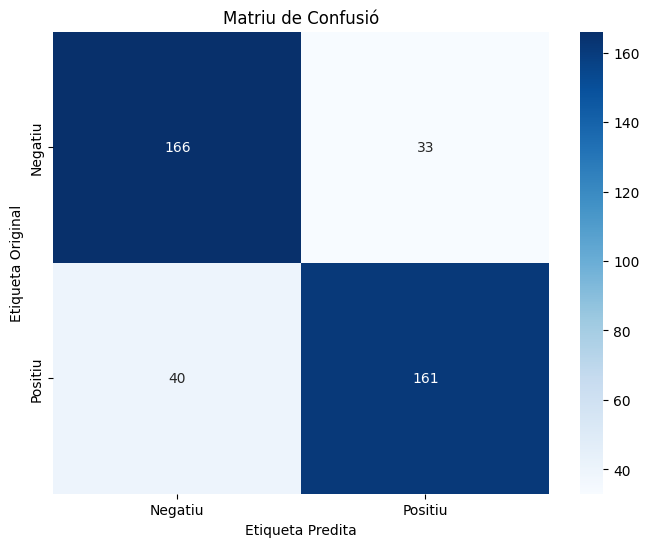

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
print(accuracy_score(y_test, y_pred_logistic))

# Calcula la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Define las etiquetas de las clases
classes = ['Negatiu', 'Positiu']

# Crea la figura
plt.figure(figsize=(8, 6))

# Crea la matriz de confusión como un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Añade etiquetas y título
plt.xlabel('Etiqueta Predita')
plt.ylabel('Etiqueta Original')
plt.title('Matriu de Confusió')


# Muestra la matriz de confusión
plt.show()


No supervisat

In [8]:
import nltk
nltk.download('sentiwordnet')


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [40]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

In [71]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Función para eliminar los determinantes de una revisión
def remove_determiners(review):
    # Tokenizar el texto en oraciones y palabras
    sentences = sent_tokenize(review)
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

    # Eliminar determinantes
    filtered_sentences = []
    for sentence in tokenized_sentences:
        tagged_words = nltk.pos_tag(sentence)
        filtered_sentence = [word for word, pos in tagged_words if pos != 'DT' and pos != 'PRP' and pos != 'PRP$' and pos != 'CC' and pos != 'MD']
        filtered_sentences.append(filtered_sentence)

    # Reconstruir las oraciones filtradas
    filtered_review = [' '.join(sentence) for sentence in filtered_sentences]
    return ' '.join(filtered_review)

# Eliminar los determinantes de cada revisión
filtered_reviews = [remove_determiners(review) for review in X_test]



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [81]:
def keep_specific_pos(review):
    # Tokenizar el texto en oraciones y palabras
    sentences = sent_tokenize(review)
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

    # Mantener palabras específicas por categoría gramatical
    filtered_sentences = []
    for sentence in tokenized_sentences:
        tagged_words = nltk.pos_tag(sentence)
        filtered_sentence = [word for word, pos in tagged_words if pos.startswith('N') # Sustantivos
                                                                    or  pos.startswith('JJ') # Adjetivos
                                                                    #or  pos.startswith('VB') # Verbos
                                                                    or  pos.startswith('RB') # Adverbios
                                                                    ]    
        filtered_sentences.append(filtered_sentence)

    # Reconstruir las oraciones filtradas
    filtered_review = [' '.join(sentence) for sentence in filtered_sentences]
    return ' '.join(filtered_review)

# Conservar sustantivos, adjetivos, verbos y adverbios de cada revisión
filtered_reviews2 = [keep_specific_pos(review) for review in X_test]


0.625


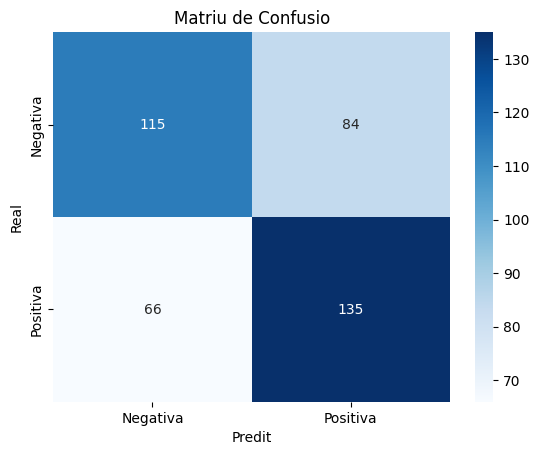

In [82]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews
from nltk.corpus import sentiwordnet as swn
import numpy as np

# Función para obtener la puntuación de polaridad de una palabra usando Lesk
def get_word_sentiment_score_with_lesk(word, context):
    # Obtener el synset con Lesk
    synset = lesk(context, word)
    if synset:
        # Obtener los sentimientos asociados al synset de SentiWordnet
        sent_synset = swn.senti_synset(synset.name())
        if sent_synset: 
            return sent_synset.pos_score() - sent_synset.neg_score()
    return 0

# Umbral de polaridad
#threshold = 0.005
threshold = 0

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Lista para almacenar las etiquetas reales y las predicciones
real_labels = []
predicted_labels = []

# Procesar cada opinión
#for opinion in filtered_reviews:
for opinion in filtered_reviews2:
#for opinion in X_test:
    # Tokenizar la opinión
    tokens = word_tokenize(opinion)
    total_sentiment_score = 0
    word_count = 0
    for i, token in enumerate(tokens):
        # Obtener el contexto de la palabra (palabras circundantes)
        context = tokens[max(0, i-5):i] + tokens[i+1:min(len(tokens), i+6)]
        # Calcular la puntuación de polaridad de la palabra
        sentiment_score = get_word_sentiment_score_with_lesk(token, context)
        total_sentiment_score += sentiment_score
        word_count += 1
    # Calcular la puntuación de polaridad promedio para la opinión
    if word_count > 0:
        average_sentiment_score = total_sentiment_score / word_count
        # Determinar si la opinión es positiva, negativa o neutra
        if average_sentiment_score >= threshold:
            predicted_labels.append("pos")
        elif average_sentiment_score < threshold:
            predicted_labels.append("neg")


# Calcular la matriz de confusión
print(accuracy_score(y_test, predicted_labels))
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Negativa", "Positiva"], yticklabels=["Negativa", "Positiva"])
plt.xlabel("Predit")
plt.ylabel("Real")
plt.title("Matriu de Confusio")
plt.show()



text server

In [4]:
from google.colab import drive
import sys
drive.mount('/content/drive')
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/plh')
from textserver import TextServer

ModuleNotFoundError: No module named 'google'

In [1]:
import requests
import pandas as pd
import json
import sys
from functools import reduce

load = lambda r: json.loads(r.encode('utf-8'))
pars = lambda r: [p for p in r['paragraphs']]
sents = lambda p: [s for s in p['sentences']]
decode = lambda x: bytes(x,'latin1').decode('utf-8')
info = lambda s, f: [f(t) for t in s['tokens']]
tokensDecode = lambda s: [decode(t['form']) for t in s['tokens']]
tokens = lambda s: [t['form'] for t in s['tokens']]
flatten = lambda l: reduce(lambda x, y: x + y, l, [])

class TextServer:
  def __init__(self, user, pwd, service='morpho'):
    self.service = service
    self.request_data = {
      'username':user,
      'password':pwd,
      'language': 'ca',
      'output': 'json',
      'interactive':'1' 
    }

  def query(self, text):
    url = "http://frodo.lsi.upc.edu:8080/TextWS/textservlet/ws/processQuery/"+self.service
    self.request_data['text_input'] = text
    resp = requests.post(url, files=self.request_data)
    if resp.status_code != requests.codes.ok : 
      resp.raise_for_status()
    return resp.text

  def tokenizer(self, text):
    self.service = 'tokenizer'
    ctnt = self.query(text)
    return list(map(tokens, sents(pars(load(ctnt))[0])))

  def morpho(self, text, pandas=False):
    def cols(t):
      return [t['form'],t['lemma'],t['tag'],t['pos']]
      
    self.service = 'morpho'
    ctnt = self.query(text)
    if pandas:
      dt = list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))
      return pd.DataFrame(flatten(dt), columns=['forma', 'lema', 'tag', 'pos'])
    else:
      return list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))

  def senses(self, text, pandas=False):
    def cols(t):
      l = [t['form'],t['lemma'],t['tag'],t['pos']]
      l += [t['wn']] if 'wn' in t else ['N/A']
      return l
        
    self.service = 'senses'
    ctnt = self.query(text)
    if pandas:
      dt = list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))
      return pd.DataFrame(flatten(dt), columns=['forma', 'lema', 'tag', 'pos', 'synset'])
    else:
      return list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))

  def entities(self, text, pandas=False):
    def cols(t):
      l = [t['form'],t['lemma'],t['tag'],t['pos']]
      l += [t['wn']] if 'wn' in t else ['N/A']
      l += [t['neclass']] if 'neclass' in t else ['N/A']
      return l
        
    self.service = 'entities'
    ctnt = self.query(text)
    if pandas:
      dt = list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))
      return pd.DataFrame(flatten(dt), columns=['forma', 'lema', 'tag', 'pos', 'synset', 'neclass'])
    else:
      return list(map(lambda s: info(s, cols), sents(pars(load(ctnt))[0])))

  def dependencies(self, text, pandas=False):
    def filtre(d): 
      res = {}
      for k in d:
        if k != 'token':
          if k!='children':
            res[k] = d[k]
          else:
            res[k] = list(map(filtre,d[k]))
      return res
        
    self.service = 'dependencies'
    ctnt = self.query(text)
    deps = [x[0] for x in map(lambda x: x['dependencies'], sents(pars(load(ctnt))[0]))]
    return list(map(filtre, deps))

  def coreferences(self, text, pandas=False):
    self.service = 'coreferences'
    self.request_data['language'] = 'en'
    ctnt = self.query(text)
    return [[c['words'] for c in x['mentions']] for x in load(ctnt)['coreferences']]
      

In [ ]:
class OpinionDetector:
    def __init__(self, user, pwd):
        self.text_server = TextServer(user, pwd)
    
    def get_synsets_and_sentiments(self, text):
        synsets_info = self.text_server.senses(text, pandas=False)
        results = []
        for sentence in synsets_info:
            sentence_results = []
            for token_info in sentence:
                form, lemma, tag, pos, synset = token_info
                if synset != 'N/A':
                    sentiment_score = self.get_sentiment_score(synset)
                    sentence_results.append((form, lemma, tag, pos, synset, sentiment_score))
                else:
                    sentence_results.append((form, lemma, tag, pos, synset, None))
            results.append(sentence_results)
        return results
    
    def get_sentiment_score(self, synset):
        # Aquí implementa la lógica para obtener el valor SentiWordNet del synset.
        # Debes definir cómo obtendrás estos valores y cómo los combinarás.
        # Si el synset no está en SentiWordNet, decide cómo manejarlo.
        # Devuelve el valor del sentimiento.
        pass

# Ejemplo de uso:
user = "tu_usuario"
pwd = "tu_contraseña"
opinion_detector = OpinionDetector(user, pwd)
text = "Tu texto de prueba aquí."
results = opinion_detector.get_synsets_and_sentiments(text)
for sentence in results:
    for token_info in sentence:
        form, lemma, tag, pos, synset, sentiment_score = token_info
        print(f"Forma: {form}, Lemma: {lemma}, TAG: {tag}, POS: {pos}, Synset: {synset}, Sentimiento: {sentiment_score}")
